# Cats And Dogs CNN 분류

In [1]:
# 패키지 로드
import sys, warnings
# sys.path.append("Y:\Python\Mega_IT")
warnings.filterwarnings('ignore')

# from yjk_module.preprocessing import *
# from yjk_module.dl_module import *

import os
# os.chdir("Y:\Python\Mega_IT\H.Deep_Learning/2.CNN")
# os.getcwd()

import helper
import zipfile
import PIL.Image
from datetime import datetime as dt
import matplotlib.pyplot as plt
import numpy as np

# from hossam.util import *
# from hossam.plot import *
# from hossam.tensor import *
# from hossam.classification import *

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, MaxPool2D, Conv2D, BatchNormalization
from keras.optimizers import RMSprop, Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, Callback, History
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical

from tensorflow.keras.datasets.fashion_mnist import load_data

2024-04-25 10:27:48.434800: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-25 10:27:48.434825: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-25 10:27:48.435434: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-25 10:27:48.439338: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-25 10:27:48.906582: W tensorflow/compiler/tf2

In [2]:
# 압축파일의 경로
file_path = './data/CatsAndDogs.zip'

# 압축을 해제할 경로
extract_dir = os.path.join(os.getcwd(), "data")

# 해당 폴더가 없다면 폴더를 생성
# if not os.path.exists(extract_dir):
#     os.mkdir(extract_dir)

# 파일의 압축 해제
# zip_ref = zipfile.ZipFile(file_path, 'r')
# zip_ref.extractall(extract_dir)
# zip_ref.close()

In [3]:
# 훈련 데이터셋 경로
train_cats_dir = os.path.join(extract_dir, 'training_set/training_set/cats')
train_dogs_dir = os.path.join(extract_dir, 'training_set/training_set/dogs')
print(train_cats_dir)
print(train_dogs_dir)

/home/yjg1005/nas/Python/Mega_IT/H.Deep_Learning/2.CNN/data/training_set/training_set/cats
/home/yjg1005/nas/Python/Mega_IT/H.Deep_Learning/2.CNN/data/training_set/training_set/dogs


In [4]:
# 검증 데이터셋 경로
test_cats_dir = os.path.join(extract_dir, 'test_set/test_set/cats')
test_dogs_dir = os.path.join(extract_dir, 'test_set/test_set/dogs')
print(test_cats_dir)
print(test_dogs_dir)

/home/yjg1005/nas/Python/Mega_IT/H.Deep_Learning/2.CNN/data/test_set/test_set/cats
/home/yjg1005/nas/Python/Mega_IT/H.Deep_Learning/2.CNN/data/test_set/test_set/dogs


In [5]:
# 데이터 개수 확인
print("훈련용 고양이 이미지: %d개" % len(os.listdir(train_cats_dir)))
print("훈련용 개 이미지: %d개" % len(os.listdir(train_dogs_dir)))
print("검증용 고양이 이미지: %d개" % len(os.listdir(test_cats_dir)))
print("검증용 개 이미지: %d개" % len(os.listdir(test_dogs_dir)))

훈련용 고양이 이미지: 4001개
훈련용 개 이미지: 4006개
검증용 고양이 이미지: 1012개
검증용 개 이미지: 1013개


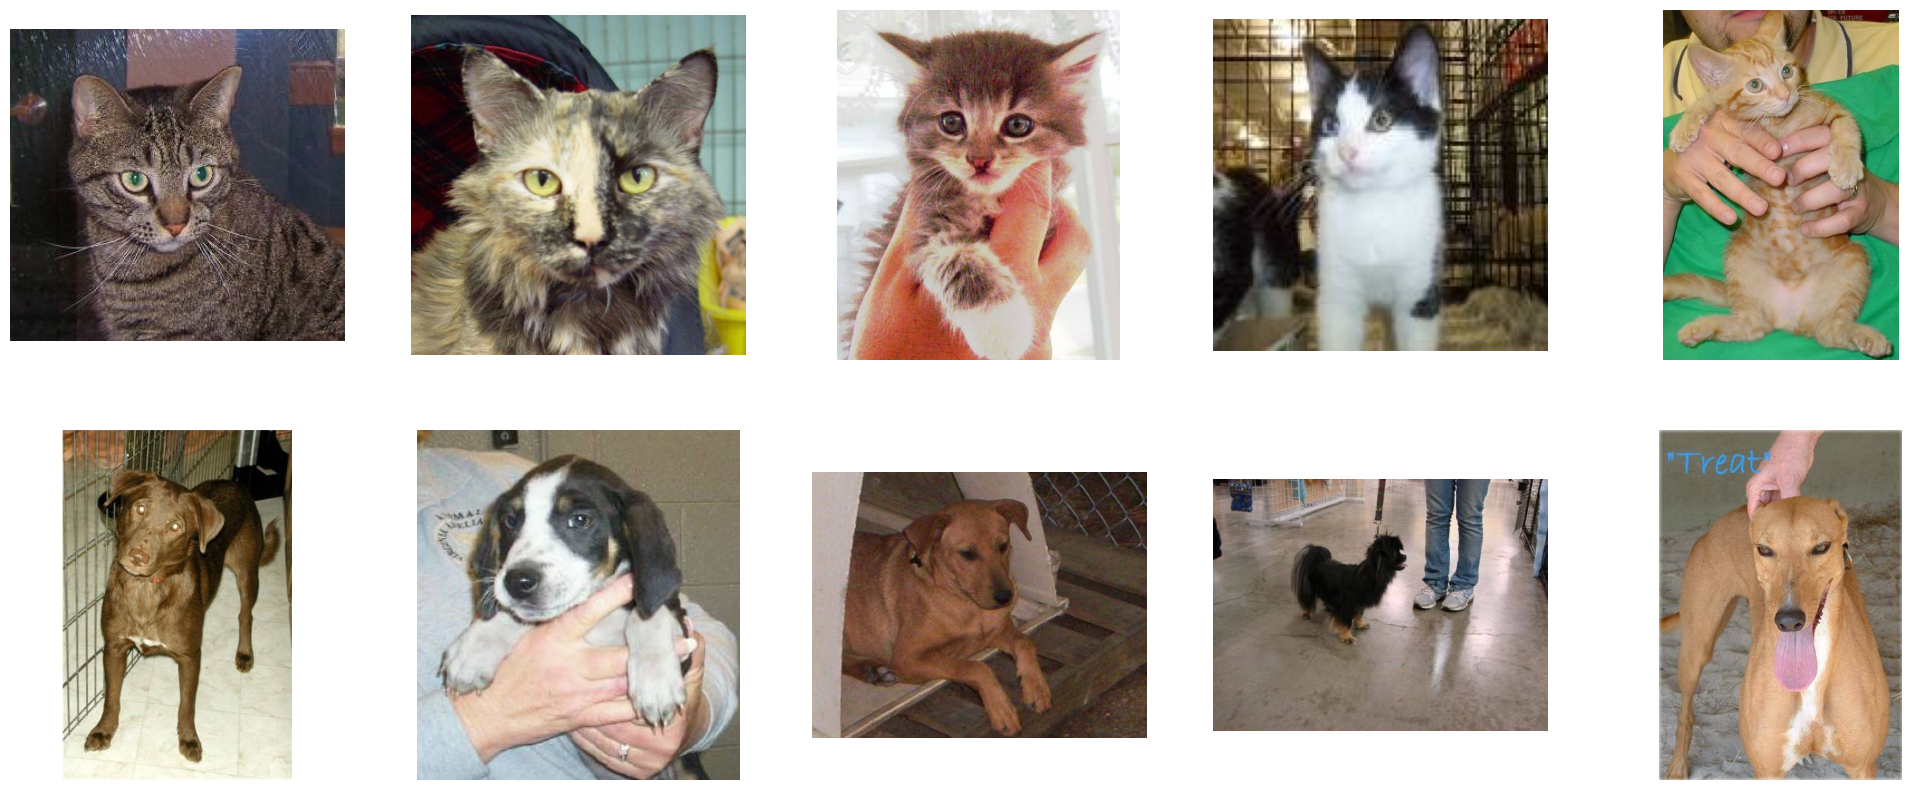

In [6]:
# 임의의 이미지 확인
fig, ax = plt.subplots(2, 5, figsize=(25, 10), dpi=100)

for i in range(0, len(ax)):

    dir = train_cats_dir if i == 0 else train_dogs_dir
    files = os.listdir(dir)

    for j in range(0, len(ax[i])):
        file_path = os.path.join(dir, files[j])
        sample = PIL.Image.open(file_path)
        ax[i][j].imshow(sample)
        ax[i][j].axis('off')

plt.show()
plt.close()

In [7]:
extract_dir

'/home/yjg1005/nas/Python/Mega_IT/H.Deep_Learning/2.CNN/data'

In [8]:
# 이미지 전처리
training_dir = os.path.join(extract_dir, "training_set/training_set")
test_dir = os.path.join(extract_dir, "test_set/test_set")

train_datagen = ImageDataGenerator( rescale = 1.0/255 )
test_datagen = ImageDataGenerator( rescale = 1.0/255 )

train_set = train_datagen.flow_from_directory(training_dir,
                                      classes=['cats', 'dogs'],
                                      batch_size=20,            # 이미지를 증강시킬 배수
                                      class_mode='binary',      # 이진분류용임을 명시
                                      target_size=(150, 150))   # 변환될 이미지 해상도

test_set = test_datagen.flow_from_directory(test_dir, classes=['cats', 'dogs'], batch_size=20,  class_mode='binary', target_size=(150, 150))

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [9]:
# CNN 모델 생성
model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(5, 5), strides=(1, 1), padding='same', activation='relu', input_shape=(150, 150, 3)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(2, 2), strides=(1, 1), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
model.summary()

2024-04-25 10:27:50.398025: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 22433 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:08:00.0, compute capability: 8.6


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 150, 150, 16)   │         1,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 150, 150, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 75, 75, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 75, 75, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 75, 75, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 75, 75, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 37, 37, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 37, 37, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 37, 37, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 37, 37, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 18, 18, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 18, 18, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 20736)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    10,617,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,632,417 (40.56 MB)

 Trainable params: 10,632,193 (40.56 MB)

 Non-trainable params: 224 (896.00 B)

In [10]:
%%time
# 모델 학습
start = dt.now()

result = model.fit(train_set, epochs=500, validation_data=test_set, callbacks = [
    EarlyStopping(monitor = 'val_loss', patience=5, verbose = 1),
    ReduceLROnPlateau(monitor= "val_loss", patience=3, factor = 0.5, min_lr=0.0001, verbose=1)
])

end = dt.now()

delta = end - start

"총 학습 소요 시간: %d(초)" % delta.seconds

Epoch 1/500


2024-04-25 10:27:53.144394: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f4bf40154e0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-04-25 10:27:53.144423: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3090, Compute Capability 8.6
2024-04-25 10:27:53.212262: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-04-25 10:27:53.506568: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8902
2024-04-25 10:27:54.171600: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


  3/401 ━━━━━━━━━━━━━━━━━━━━ 19s 48ms/step - acc: 0.4083 - loss: 18.1349

I0000 00:00:1714008477.901336    3559 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


401/401 ━━━━━━━━━━━━━━━━━━━━ 61s 134ms/step - acc: 0.6009 - loss: 2.5150 - val_acc: 0.5240 - val_loss: 3.0276 - learning_rate: 0.0010
Epoch 2/500
401/401 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - acc: 0.7159 - loss: 0.5603 - val_acc: 0.6189 - val_loss: 0.6358 - learning_rate: 0.0010
Epoch 3/500
401/401 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - acc: 0.7675 - loss: 0.4822 - val_acc: 0.6911 - val_loss: 0.6016 - learning_rate: 0.0010
Epoch 4/500
401/401 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - acc: 0.7829 - loss: 0.4523 - val_acc: 0.7360 - val_loss: 0.5837 - learning_rate: 0.0010
Epoch 5/500
401/401 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - acc: 0.8119 - loss: 0.3990 - val_acc: 0.7247 - val_loss: 0.5886 - learning_rate: 0.0010
Epoch 6/500
401/401 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - acc: 0.8437 - loss: 0.3556 - val_acc: 0.7316 - val_loss: 0.6072 - learning_rate: 0.0010
Epoch 7/500
394/401 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - acc: 0.8685 - loss: 0.2952
Epoch 7: ReduceLROnPlateau reducing learning rate to 0.000

'총 학습 소요 시간: 151(초)'

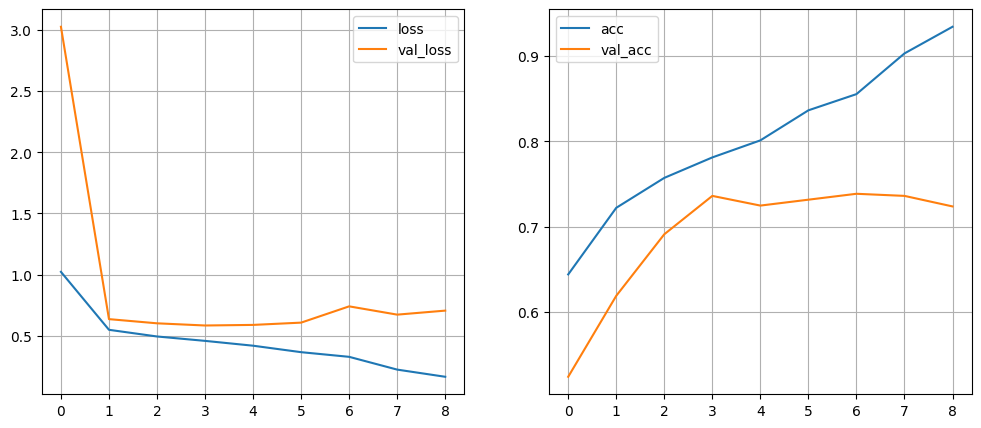

401/401 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - acc: 0.9322 - loss: 0.1720
최종 훈련 손실률: 0.172937, 최종 훈련 정확도: 0.931668
102/102 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - acc: 0.7065 - loss: 0.7598
최종 검증 손실률: 0.705432, 최종 검증 정확도: 0.723678


In [11]:
# 학습 결과 평가
# tf_result(result)
hist_dict = result.history

fig, ax = plt.subplots(1, 2, figsize = (12, 5))
ax[0].plot(hist_dict['loss'], label = 'loss')
ax[0].plot(hist_dict['val_loss'], label = 'val_loss')
ax[0].legend()
ax[0].grid()

ax[1].plot(hist_dict['acc'], label = 'acc')
ax[1].plot(hist_dict['val_acc'], label = 'val_acc')
ax[1].legend()
ax[1].grid()

plt.show()

evaluate1 = model.evaluate(train_set)
print("최종 훈련 손실률: %f, 최종 훈련 정확도: %f" % (evaluate1[0], evaluate1[1]))

evaluate2 = model.evaluate(test_set)
print("최종 검증 손실률: %f, 최종 검증 정확도: %f" % (evaluate2[0], evaluate2[1]))

In [12]:
# 예측 결과 산정
pred = model.predict(train_set)
data_count, case_count = pred.shape
print("%d개의 검증 데이터가 %d개의 경우의 수를 갖는다." % (data_count, case_count))
pred[0]

401/401 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step
8005개의 검증 데이터가 1개의 경우의 수를 갖는다.


array([0.01326895], dtype=float32)

In [13]:
pred_result = np.round(pred)
pred_result = pred_result.flatten()
pred_result

array([0., 1., 1., ..., 1., 1., 1.], dtype=float32)

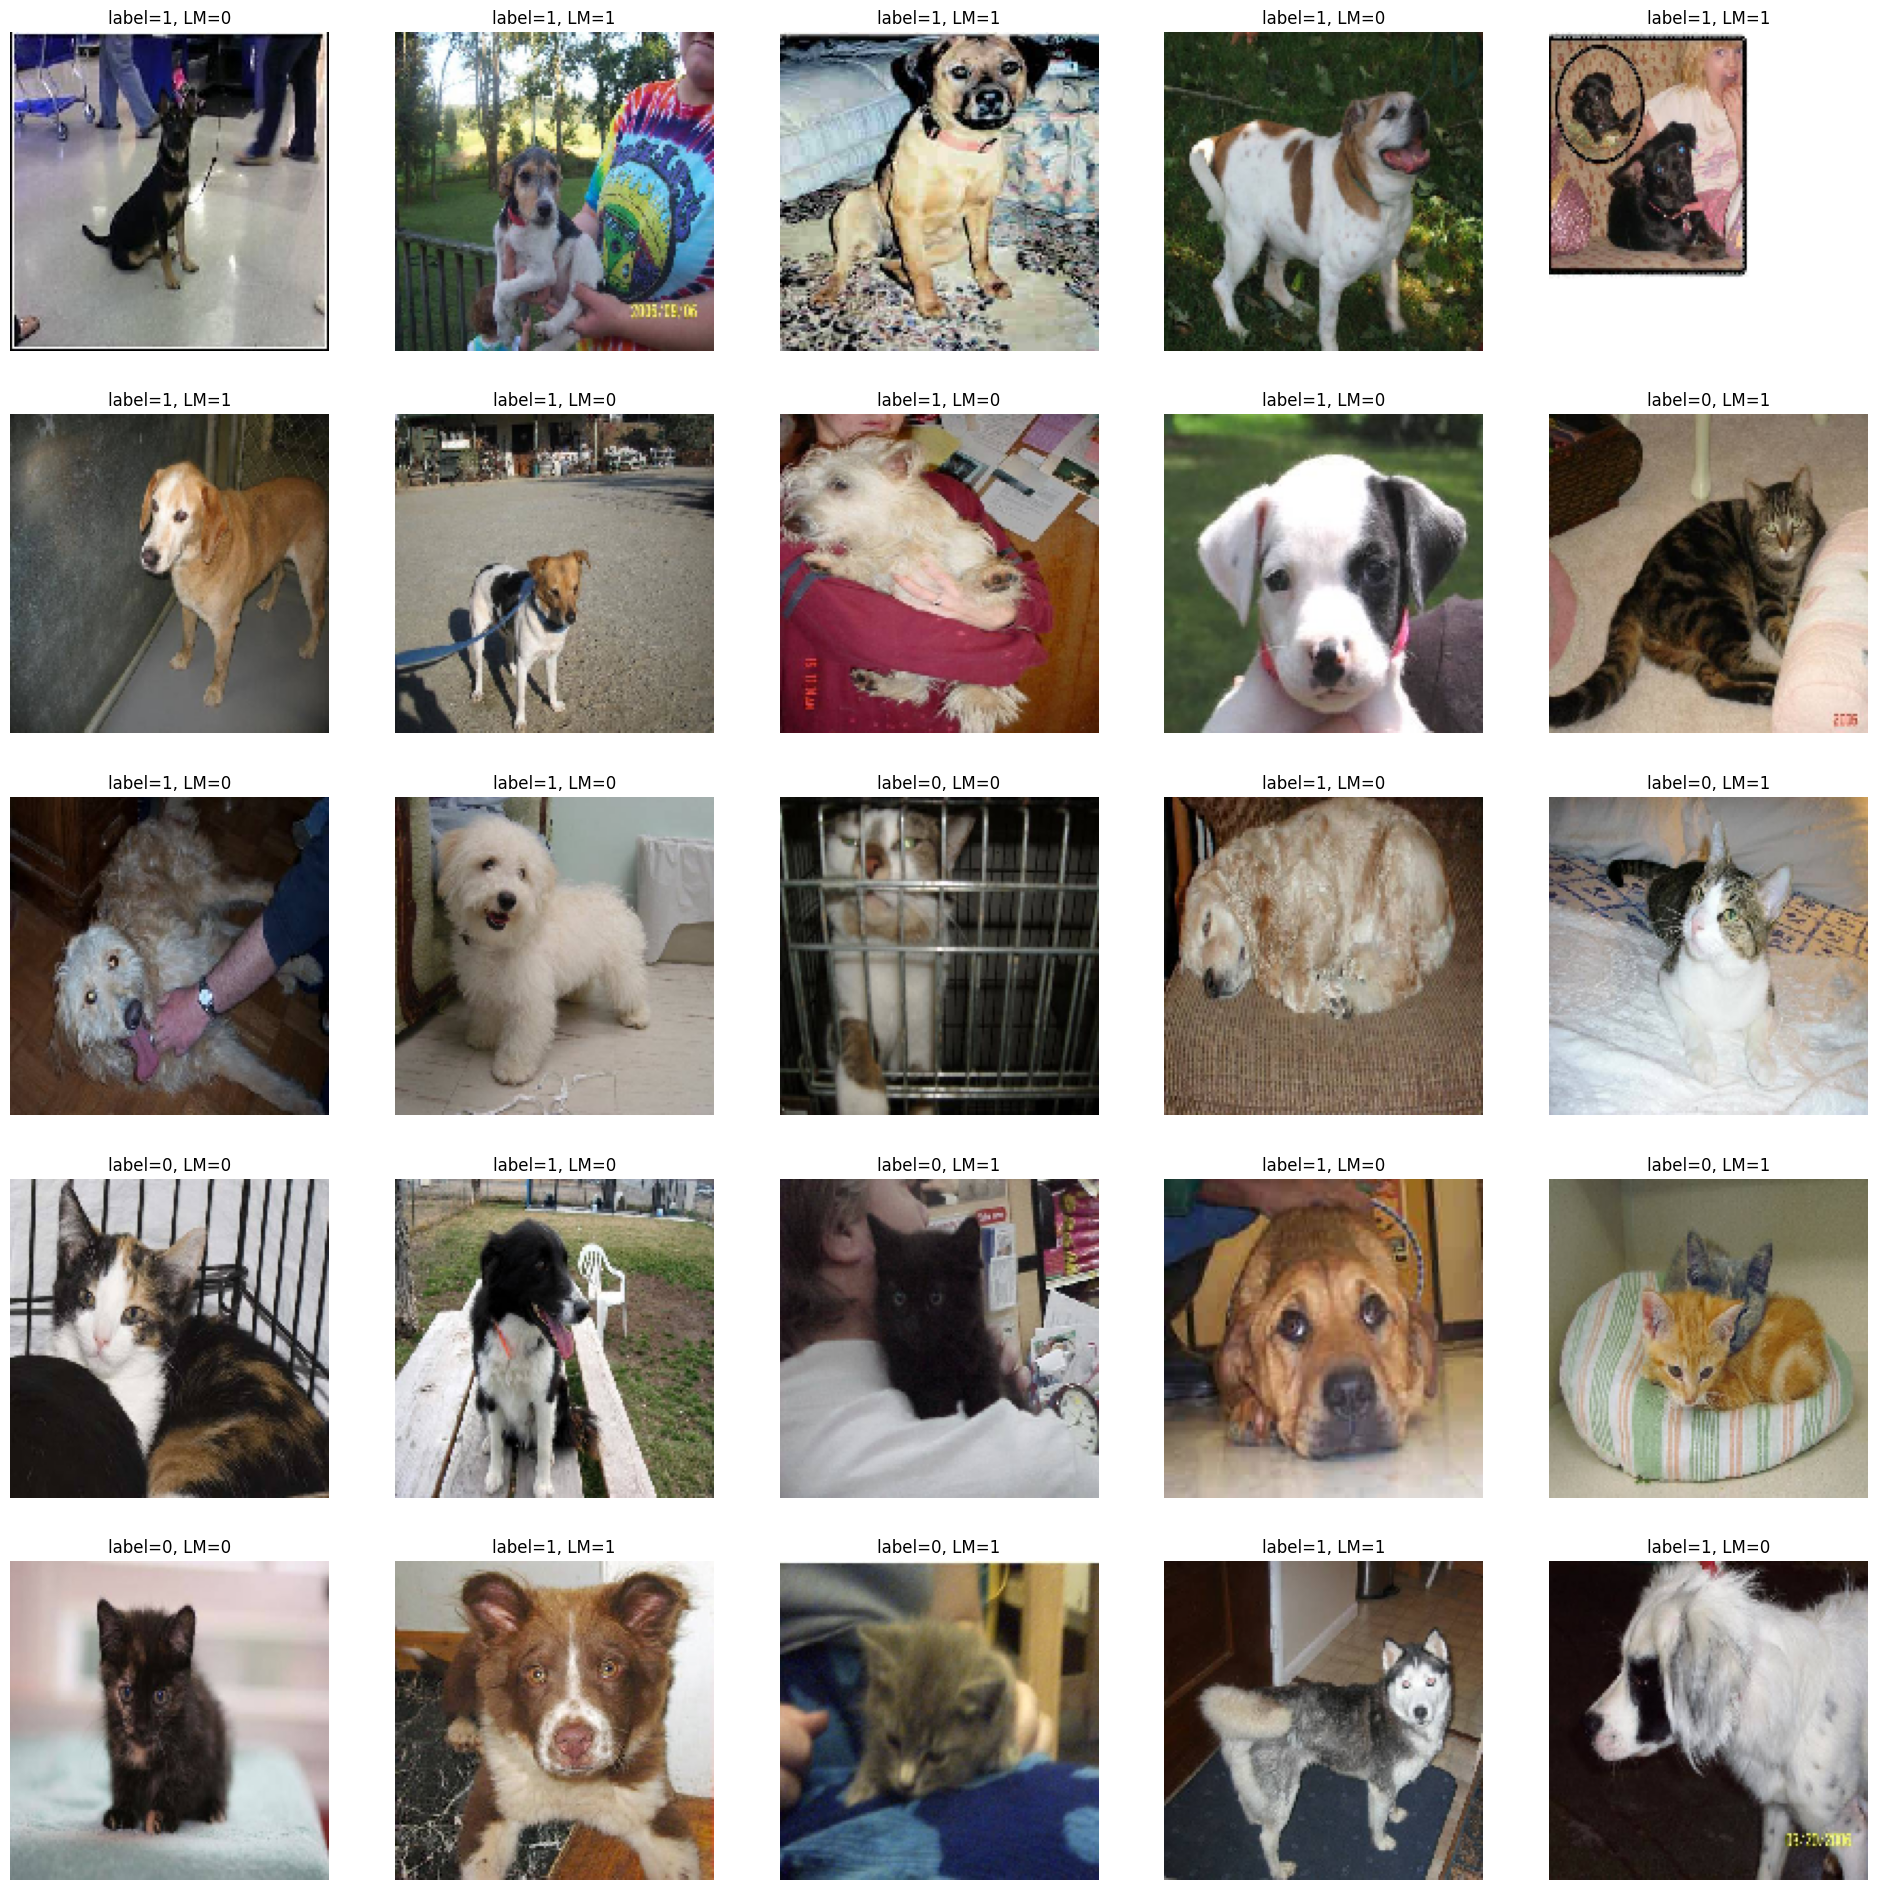

In [16]:
# 예측 결과 최종 확인
row = 5
col = 5
fig, ax = plt.subplots(row, col, figsize=((col+1)*4, (row+1)*4), dpi=100)

size = row*col
length = len(train_set)

for i in range(0, size):
    img, label = train_set[i]
    ax[i//col][i%col].imshow(img[0])
    ax[i//col][i%col].set_title("label=%d, LM=%d" % (label[0], pred_result[i]))
    ax[i//col][i%col].axis('off')

plt.show()
plt.close()